# Statsmodels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf # For R-like formulas
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats # For comparing with statsmodels t-test later if needed

### --- 1. Data Preparation ---

In [2]:
print("\n1. Data Preparation (for Linear Regression)")
print("------------------------------------------")
# Create a synthetic dataset for demonstration
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples, 2) * 10 # Two independent variables
# True relationship: y = 2*X1 + 3*X2 + 5 + noise
y = 2 * X[:, 0] + 3 * X[:, 1] + 5 + np.random.randn(n_samples) * 2

# Put data into a Pandas DataFrame, which is common for statsmodels
data = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Y': y})
print("Sample data (first 5 rows):\n", data.head())



1. Data Preparation (for Linear Regression)
------------------------------------------
Sample data (first 5 rows):
          X1        X2          Y
0  3.745401  9.507143  39.652182
1  7.319939  5.986585  38.064141
2  1.560186  1.559945  13.386353
3  0.580836  8.661761  30.718254
4  6.011150  7.080726  41.996027


### --- 2. Ordinary Least Squares (OLS) Regression ---

In [5]:
print("\n2. Ordinary Least Squares (OLS) Regression")
print("----------------------------------------")

# Method 1: Using the formula API (R-like syntax) - Recommended for simplicity
print("\n--- Using formula API (smf.ols) ---")
# 'Y ~ X1 + X2' means Y is dependent on X1 and X2. Intercept is added automatically.
model_formula = smf.ols('Y ~ X1 + X2', data=data)
results_formula = model_formula.fit()

# Print the comprehensive summary
print(results_formula.summary())

# Access key attributes of the results
print(f"\nR-squared: {results_formula.rsquared:.4f}")
# CORRECTED LINE BELOW:
print(f"Adjusted R-squared: {results_formula.rsquared_adj:.4f}")
print(f"P-values for coefficients:\n{results_formula.pvalues.round(4)}")
print(f"Coefficients:\n{results_formula.params.round(4)}")
print(f"Predicted values (first 5): {results_formula.predict(data.head(5)).round(2)}")


# Method 2: Using the array API (lower-level, requires adding constant for intercept)
print("\n--- Using array API (sm.OLS) ---")
# Add a constant (intercept) to the independent variables
X_with_constant = sm.add_constant(X)
model_array = sm.OLS(y, X_with_constant)
results_array = model_array.fit()

# Print the comprehensive summary (should be identical to formula API for this case)
print(results_array.summary())


2. Ordinary Least Squares (OLS) Regression
----------------------------------------

--- Using formula API (smf.ols) ---
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1377.
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           6.28e-72
Time:                        12:41:46   Log-Likelihood:                -210.27
No. Observations:                 100   AIC:                             426.5
Df Residuals:                      97   BIC:                             434.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------

### --- 3. Model Diagnostics for OLS ---


3. Model Diagnostics for OLS
----------------------------
First 5 residuals: 0   -1.83
1   -0.00
2    0.83
3   -1.63
4    3.28
dtype: float64


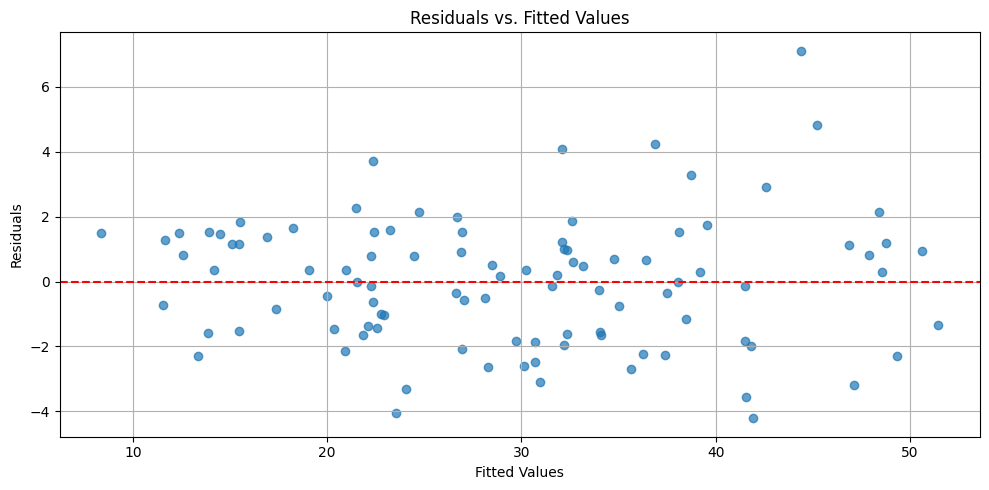


QQ-Plot (Quantile-Quantile Plot) for Residuals:


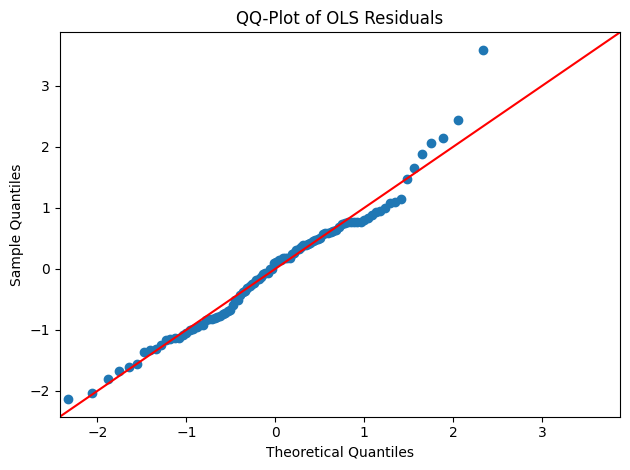

In [6]:

print("\n3. Model Diagnostics for OLS")
print("----------------------------")
# Get residuals
residuals = results_formula.resid
print(f"First 5 residuals: {residuals.head().round(2)}")

# Plotting residuals vs. fitted values (for homoscedasticity check)
plt.figure(figsize=(10, 5))
plt.scatter(results_formula.fittedvalues, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

# QQ-Plot for normality of residuals
print("\nQQ-Plot (Quantile-Quantile Plot) for Residuals:")
fig = sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ-Plot of OLS Residuals')
plt.tight_layout()
plt.show()

### --- 4. Generalized Linear Models (GLM) ---

In [7]:


print("\n4. Generalized Linear Models (GLM - Example: Poisson Regression for Count Data)")
print("-------------------------------------------------------------------------")
# Generate synthetic count data
np.random.seed(42)
lambda_true = np.exp(0.5 * X[:, 0] - 0.2 * X[:, 1] + 1) # Log-linear relationship
counts = np.random.poisson(lambda_true)
data_glm = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Counts': counts})

# Fit a Poisson GLM
# family=sm.families.Poisson() specifies the distribution of the response variable
# link=sm.families.links.log() specifies the link function (default for Poisson is log)
poisson_model = smf.glm('Counts ~ X1 + X2', data=data_glm, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

print(poisson_results.summary())
print(f"\nGLM Poisson Coefficients:\n{poisson_results.params.round(4)}")
print(f"GLM Poisson P-values:\n{poisson_results.pvalues.round(4)}")



4. Generalized Linear Models (GLM - Example: Poisson Regression for Count Data)
-------------------------------------------------------------------------
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Counts   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -264.57
Date:                Fri, 13 Jun 2025   Deviance:                       116.48
Time:                        12:41:56   Pearson chi2:                     111.
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z| 

### --- 5. Time Series Analysis (ARIMA) ---


5. Time Series Analysis (ARIMA - AutoRegressive Integrated Moving Average)
---------------------------------------------------------------------
Sample Time Series (first 5):
 2020-01-01     2.483571
2020-02-01     4.912584
2020-03-01    10.959771
2020-04-01    20.791601
2020-05-01    21.024097
Freq: MS, dtype: float64


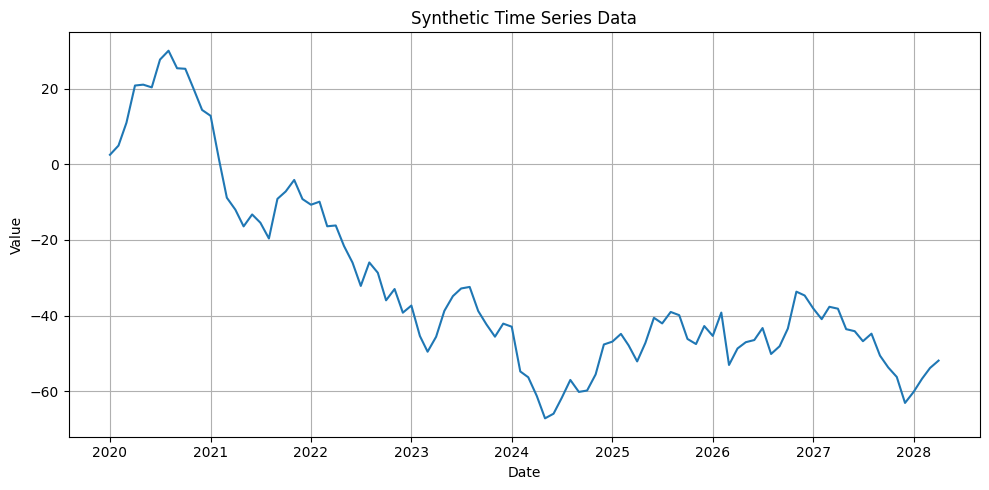


Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plots:


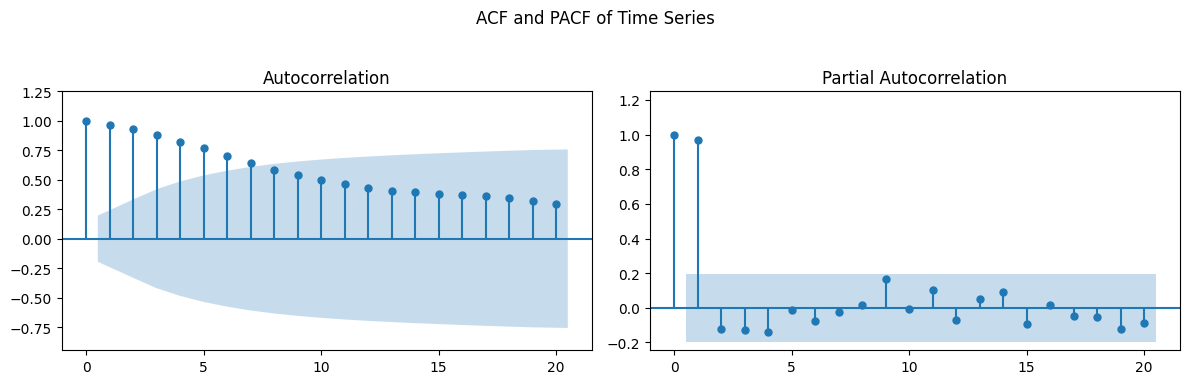


ARIMA(1,1,1) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -297.214
Date:                Fri, 13 Jun 2025   AIC                            600.428
Time:                        12:41:58   BIC                            608.214
Sample:                    01-01-2020   HQIC                           603.578
                         - 04-01-2028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5862      0.580      1.011      0.312      -0.551       1.723
ma.L1         -0.4673      0.639     -0.731      0.465      -1.720       0.786
sigma2        23.7165  

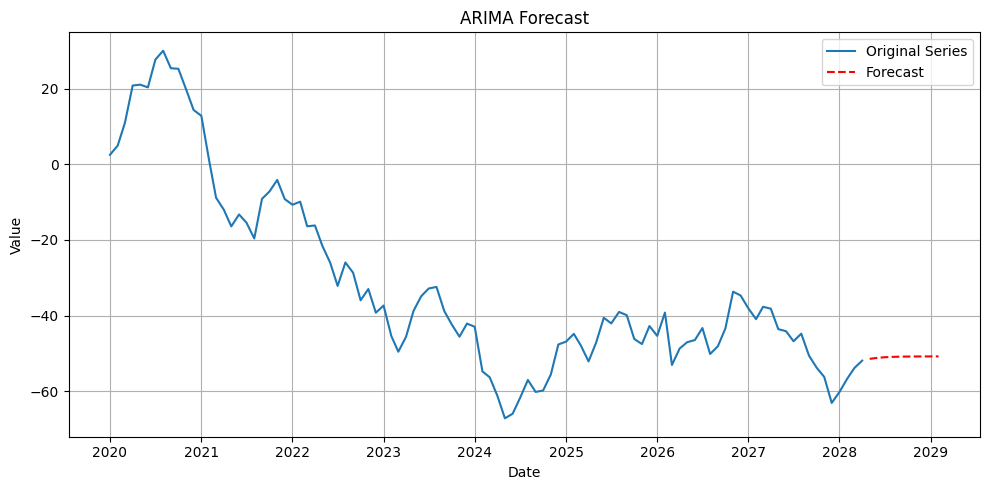

In [8]:

print("\n5. Time Series Analysis (ARIMA - AutoRegressive Integrated Moving Average)")
print("---------------------------------------------------------------------")
# Generate some synthetic time series data
np.random.seed(42)
# Create a date range for the index
idx = pd.date_range(start='2020-01-01', periods=100, freq='MS') # Monthly frequency
ts_data = np.cumsum(np.random.randn(100) * 5) + np.sin(np.linspace(0, 2*np.pi*5, 100)) * 10
ts = pd.Series(ts_data, index=idx)
print("Sample Time Series (first 5):\n", ts.head())

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(ts)
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot ACF and PACF to help identify ARIMA orders (p, d, q)
print("\nAutocorrelation (ACF) and Partial Autocorrelation (PACF) Plots:")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(ts, ax=axes[0], lags=20, auto_ylims=True)
plot_pacf(ts, ax=axes[1], lags=20, auto_ylims=True)
plt.suptitle('ACF and PACF of Time Series')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Fit an ARIMA model (e.g., ARIMA(1,1,1))
# order=(p, d, q) where p=AR order, d=differencing order, q=MA order
try:
    arima_model = ARIMA(ts, order=(1, 1, 1))
    arima_results = arima_model.fit()
    print("\nARIMA(1,1,1) Model Summary:")
    print(arima_results.summary())

    # Make predictions (forecast)
    forecast_steps = 10
    forecast_results = arima_results.forecast(steps=forecast_steps)
    print(f"\nForecast for next {forecast_steps} steps:\n{forecast_results.round(2)}")

    # Plot forecast (optional)
    plt.figure(figsize=(10, 5))
    plt.plot(ts, label='Original Series')
    plt.plot(forecast_results.index, forecast_results, color='red', linestyle='--', label='Forecast')
    plt.title('ARIMA Forecast')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"\nCould not fit ARIMA model. Error: {e}")
    print(" ARIMA models can be sensitive to data characteristics.")



### --- 6. Statistical Tests (Example: Durbin-Watson for autocorrelation in OLS residuals) ---

In [9]:
print("\n6. Statistical Tests (Example: Durbin-Watson Test)")
print("-------------------------------------------------")
# Durbin-Watson test for autocorrelation in OLS residuals
# A value around 2 indicates no autocorrelation. <2 suggests positive, >2 suggests negative.
dw_test_stat = sm.stats.stattools.durbin_watson(results_formula.resid)
print(f"Durbin-Watson statistic for OLS residuals: {dw_test_stat:.4f}")
if dw_test_stat < 1.5 or dw_test_stat > 2.5:
    print(" (Suggests presence of autocorrelation in residuals, possibly violating OLS assumptions)")
else:
    print(" (Suggests no significant autocorrelation)")

# There are many other tests, e.g., Jarque-Bera for normality (in summary output)
# or tests for heteroscedasticity.

print("\n--- End of Statsmodels Script ---")


6. Statistical Tests (Example: Durbin-Watson Test)
-------------------------------------------------
Durbin-Watson statistic for OLS residuals: 2.1044
 (Suggests no significant autocorrelation)

--- End of Statsmodels Script ---
